In [12]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [13]:
visible = Input(shape=(64,64,1))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
hidden1 = Dense(10, activation='relu')(pool2)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='convolutional_neural_network.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 61, 61, 32)        544       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 27, 27, 16)        8208      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
dense_15 (Dense)             (None, 13, 13, 10)        170       
_________________________________________________________________
dense_16 (Dense)             (None, 13, 13, 1)         11        
Total para

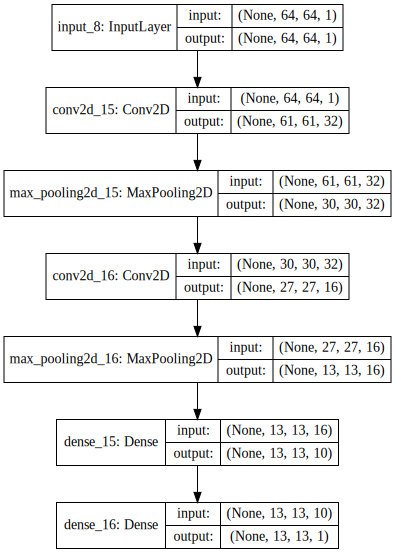

In [14]:
plot_model(model, to_file='shared_input_layer.png')
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [15]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
# input layer
visible = Input(shape=(64,64,1))
# first feature extractor
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)
# second feature extractor
conv2 = Conv2D(16, kernel_size=8, activation='relu')(visible)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)
# merge feature extractors
merge = concatenate([flat1, flat2])
# interpretation layer
hidden1 = Dense(10, activation='relu')(merge)
# prediction output
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='shared_input_layer.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 61, 61, 32)   544         input_9[0][0]                    
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 57, 57, 16)   1040        input_9[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_17 (MaxPooling2D) (None, 30, 30, 32)   0           conv2d_17[0][0]                  
__________________________________________________________________________________________________
max_poolin

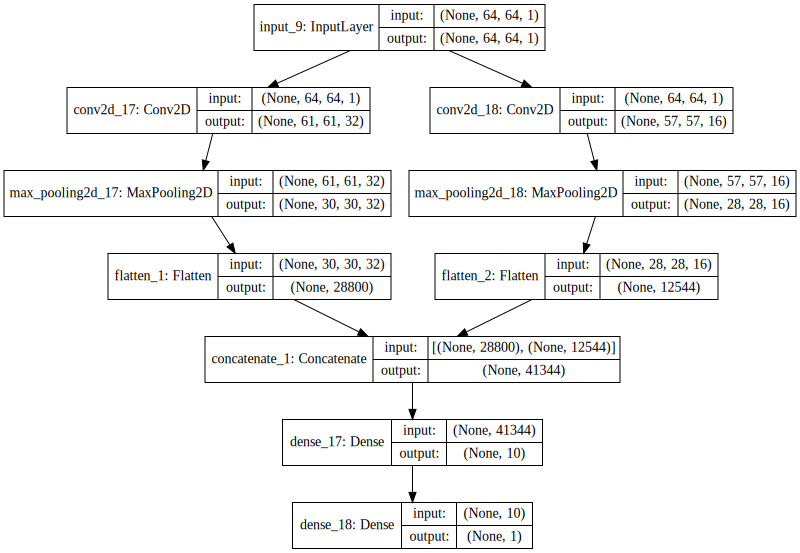

In [16]:
plot_model(model, to_file='shared_input_layer.png')
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [17]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers.recurrent import LSTM
from keras.layers.merge import concatenate
# define input
visible = Input(shape=(100,1))
# feature extraction
extract1 = LSTM(10)(visible)
# first interpretation model
interp1 = Dense(10, activation='relu')(extract1)
# second interpretation model
interp11 = Dense(10, activation='relu')(extract1)
interp12 = Dense(20, activation='relu')(interp11)
interp13 = Dense(10, activation='relu')(interp12)
# merge interpretation
merge = concatenate([interp1, interp13])
# output
output = Dense(1, activation='sigmoid')(merge)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='shared_feature_extractor.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 100, 1)       0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 10)           480         input_10[0][0]                   
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 10)           110         lstm_1[0][0]                     
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 20)           220         dense_20[0][0]                   
__________________________________________________________________________________________________
dense_19 (

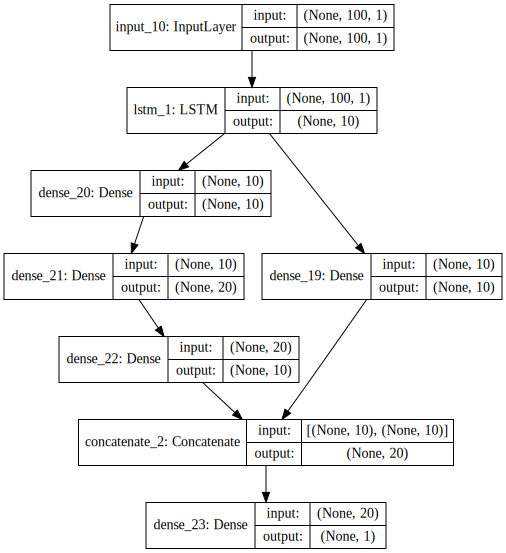

In [18]:
plot_model(model, to_file='shared_input_layer.png')
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))